In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [7]:
# single x, y data point
np.random.seed(42)
single_data_point = np.random.randint(0, 100, 2)
single_data_point

array([51, 92])

In [14]:
# single label 1/0
single_label = np.random.randint(0, 2)
single_label

1

In [22]:
# mock-data to play with
def generate_data(num_samples, num_features = 2):
    """Randomly generates a number of datapoints"""
    data_size = (num_samples, num_features)
    data = np.random.randint(0, 100, size = data_size)
    labels_size = (num_samples, 1)
    labels = np.random.randint(0, 2, size = labels_size)
    return data.astype(np.float32), labels

In [23]:
# training data
train_data, labels = generate_data(11)
train_data

array([[82., 86.],
       [74., 74.],
       [87., 99.],
       [23.,  2.],
       [21., 52.],
       [ 1., 87.],
       [29., 37.],
       [ 1., 63.],
       [59., 20.],
       [32., 75.],
       [57., 21.]], dtype=float32)

In [25]:
train_data[0], labels[0]

(array([82., 86.], dtype=float32), array([0]))

Text(0,0.5,'ordinate')

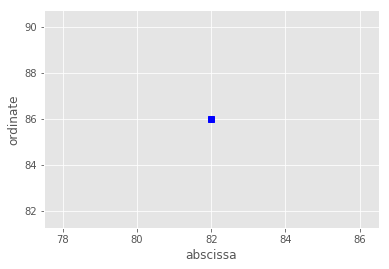

In [27]:
# ploting the training set
plt.plot(train_data[0, 0], train_data[0, 1], 'sb')
plt.xlabel('abscissa')
plt.ylabel('ordinate')

In [29]:
def plot_data(all_blue, all_red):
    plt.scatter(all_blue[:, 0], all_blue[:, 1], c='b', marker = 's', s = 180)
    plt.scatter(all_red[:, 0], all_red[:, 1], c='r', marker = '^', s=180)
    plt.xlabel('abscissa (feature 1)')
    plt.ylabel('ordinate (feature 2)')

In [31]:
labels.ravel() == 0

array([ True, False,  True,  True,  True,  True,  True, False, False,
       False, False])

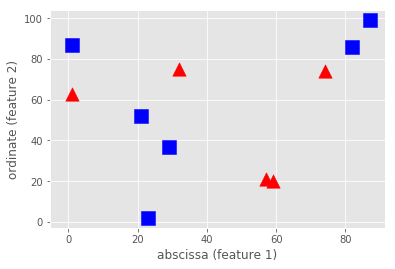

In [32]:
# blue is 0 red is 1
blue = train_data[labels.ravel() == 0]
red = train_data[labels.ravel() == 1]
plot_data(blue, red)

In [34]:
knn = cv2.ml.KNearest_create()
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)

True

In [35]:
newcomer, _ = generate_data(1)
newcomer

array([[79., 14.]], dtype=float32)

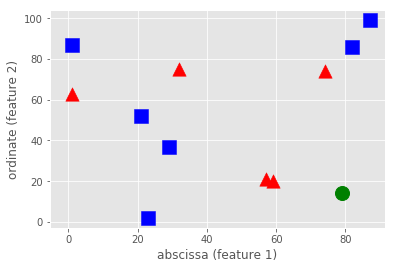

In [43]:
plot_data(blue, red)
plt.plot(newcomer[0, 0], newcomer[0, 1], 'go', markersize=14)

In [48]:
# classification with 1 nearest neighbor k = 1
ret, results, neighbor, dist = knn.findNearest(newcomer, 1)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print('Distance to neighbor:\t', dist)

Predicted label:	 [[1.]]
Neighbor's label:	 [[1.]]
Distance to neighbor:	 [[436.]]


In [49]:
# classification with k = 7
ret, results, neighbor, dist = knn.findNearest(newcomer, 7)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print('Distance to neighbor:\t', dist)

Predicted label:	 [[0.]]
Neighbor's label:	 [[1. 1. 0. 0. 1. 0. 0.]]
Distance to neighbor:	 [[ 436.  533. 3029. 3280. 3625. 4808. 5193.]]
